In [1]:
# Importing the required Libraries
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier



In [2]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.shape

(150, 6)

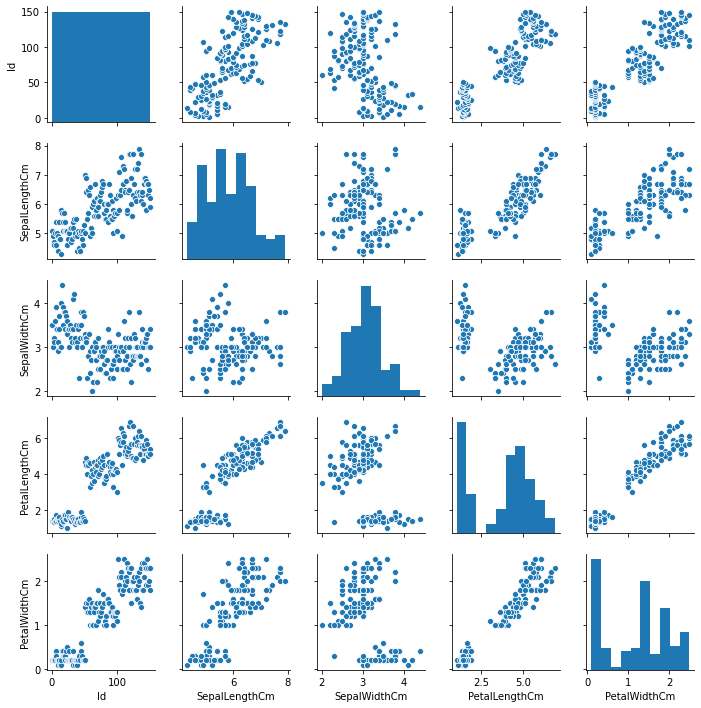

In [6]:
import seaborn as sns
sns.pairplot(iris_df,height=2)

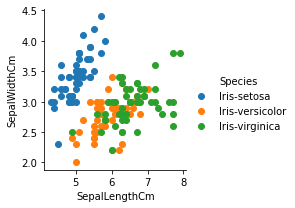

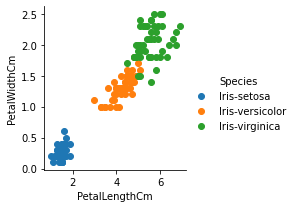

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(iris_df,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(iris_df,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

In [3]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
X[0:5]
y = iris_df["Species"]
y[0:5]
x_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=2)


In [6]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth,random_state=2)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    validation_accuracy.append(dt_model.score(X_test,y_test))

In [33]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.651786,0.710526
1,2,0.964286,0.947368
2,3,0.982143,0.973684
3,4,1.000000,0.947368
4,5,1.000000,0.947368


In [11]:
train_accuracy1=[]
validation_accuracy1=[]
for min_samples in range(1,10):
    dt_model1=DecisionTreeClassifier(max_depth=3,min_samples_leaf=min_samples,random_state=2)
    dt_model1.fit(x_train,y_train)
    train_accuracy1.append(dt_model1.score(x_train,y_train))
    validation_accuracy1.append(dt_model1.score(X_test,y_test))

In [12]:
frame1=pd.DataFrame({'min_samples_leaf':range(1,10),'train_acc':train_accuracy1,'valid_acc':validation_accuracy1})
frame1.head()

,min_samples_leaf,train_acc,valid_acc
0,1,0.982143,0.973684
1,2,0.982143,0.973684
2,3,0.982143,0.973684
3,4,0.982143,0.973684
4,5,0.964286,0.947368


In [13]:
train_accuracy2=[]
validation_accuracy2=[]
for min_split in range(2,10):
    dt_model2=DecisionTreeClassifier(max_depth=3,min_samples_leaf=3,min_samples_split=min_split,random_state=2)
    dt_model2.fit(x_train,y_train)
    train_accuracy2.append(dt_model2.score(x_train,y_train))
    validation_accuracy2.append(dt_model2.score(X_test,y_test))

In [32]:
frame2=pd.DataFrame({'min_samples_split':range(2,10),'train_acc':train_accuracy2,'valid_acc':validation_accuracy2})
frame2.head()

,min_samples_split,train_acc,valid_acc
0,2,0.982143,0.973684
1,3,0.982143,0.973684
2,4,0.982143,0.973684
3,5,0.982143,0.973684
4,6,0.982143,0.973684


In [15]:
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}

In [16]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(decision_tree,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)

In [17]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:   26.3s finished
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [18]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [19]:
grid.best_score_

0.9732142857142857

In [20]:
dt_1=grid.best_estimator_
dt_1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
from sklearn import metrics
y_train_predict=dt_1.predict(x_train)
y_test_predict=dt_1.predict(X_test)
test_score= metrics.accuracy_score(y_test,y_test_predict)
train_score=metrics.accuracy_score(y_train,y_train_predict)
print("train score:",train_score)
print("test score:",test_score)

train score: 0.9821428571428571
test score: 0.9736842105263158


In [22]:
prediction = grid.predict(X_test)

In [26]:
from sklearn import preprocessing 
  
label_encoder_test = preprocessing.LabelEncoder() 
label_encoder_pred=preprocessing.LabelEncoder()
  

y_test= label_encoder_test.fit_transform(y_test)
prediction =label_encoder_pred.fit_transform(prediction)
  


In [27]:
print(y_test)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


In [28]:
print(prediction)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


In [30]:
from sklearn.metrics import classification_report,confusion_matrix

print("confusion_matrix:- \n",confusion_matrix(y_test,prediction))
print("classification report:\n\n",classification_report(y_test,prediction))


confusion_matrix:- 
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [29]:
print (prediction[0:5])
print (y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa']
6         Iris-setosa
3         Iris-setosa
113    Iris-virginica
12        Iris-setosa
24        Iris-setosa
Name: Species, dtype: object


In [30]:
grid.predict([[4.7, 3.2, 1.3, 0.2]])

array(['Iris-setosa'], dtype=object)

In [31]:
grid.predict([[5.0,3.6, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)

In [34]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         166 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhd1c1de3_3

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



pydotplus-2.0.2      | 23 KB     | ##################################### | 100% 
certifi-2020.12.5    | 143 KB    | ##################################### | 100% 
Prepar

In [40]:
from  io import StringIO
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

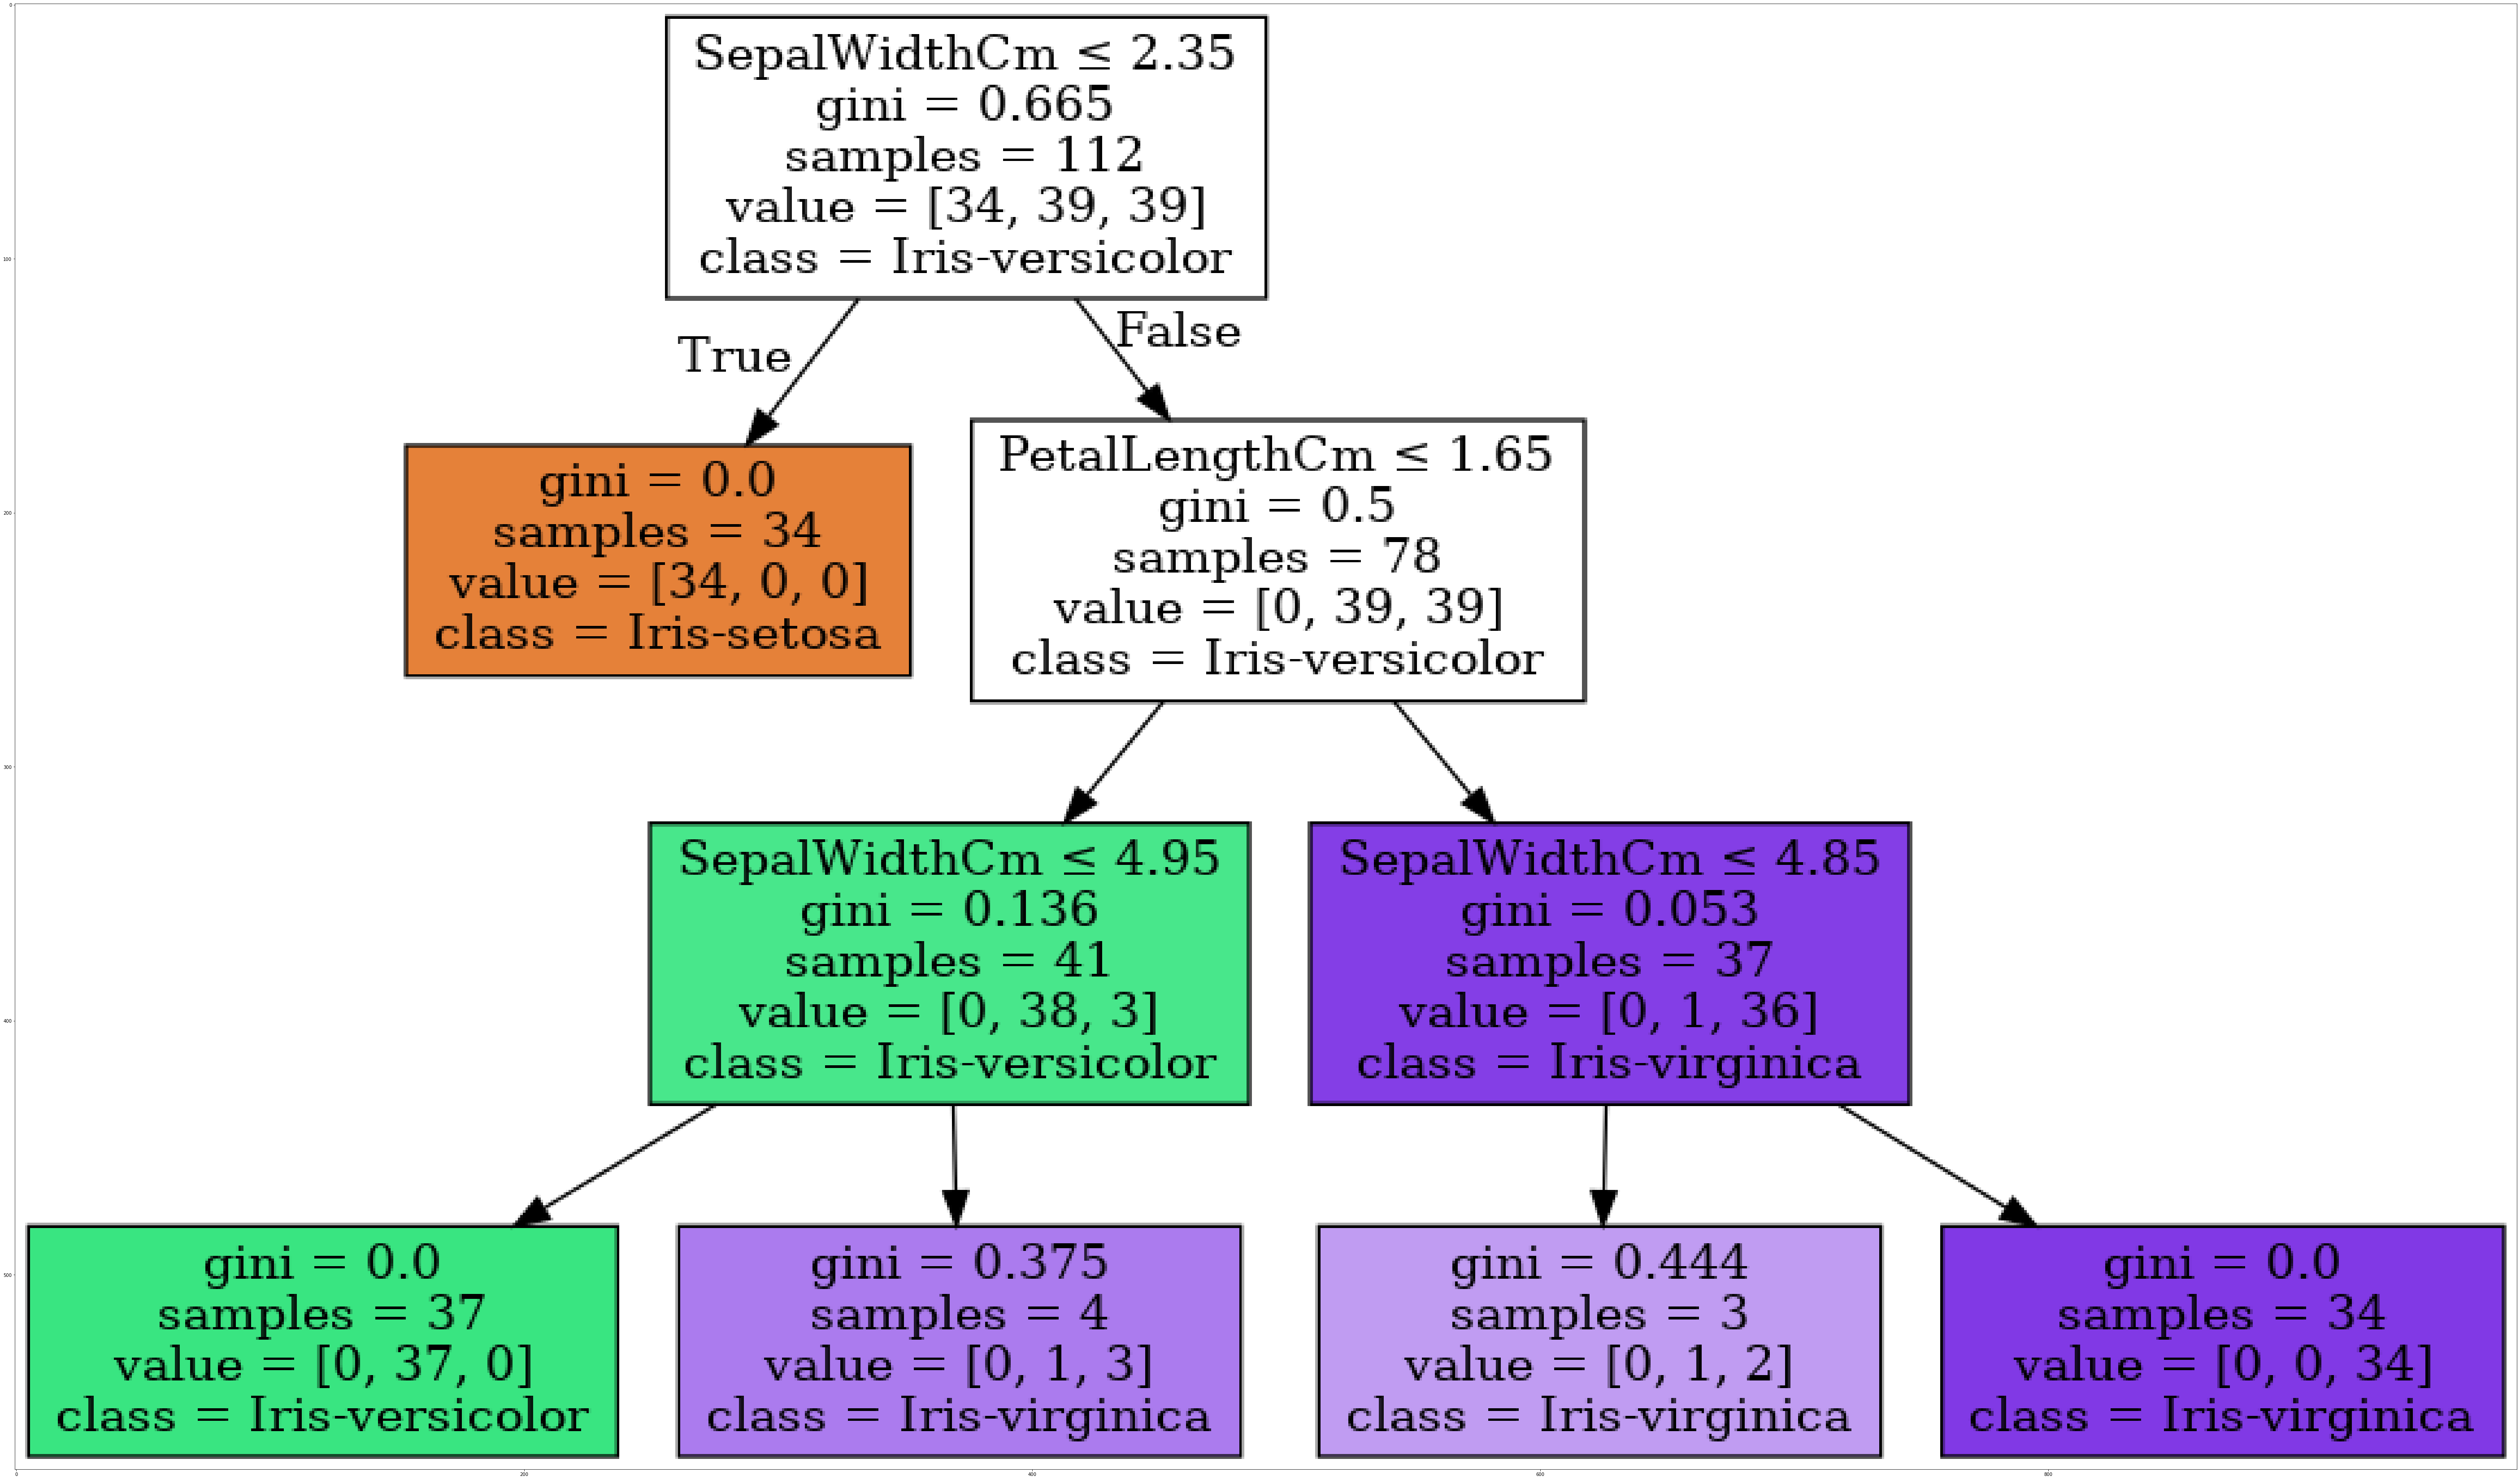

In [41]:
dot_data = StringIO()
filename = "species.png"
featureNames = iris_df.columns[0:4]
targetNames = iris_df["Species"].unique().tolist()
out=tree.export_graphviz(dt_1,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 500))
plt.imshow(img,interpolation='nearest')